# Breast Cancer detection using different machine learning algorithms

Objective : - The aims in this project is to observe which machine learning algorithm  are most helpful in predicting 
malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. 
The goal is to classify whether the breast cancer is benign or malignant. 

You can download the dataset from here - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# Attribute Information

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values) 
c) perimeter
d) area 
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant



In [3]:
#Importing Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Importing the cancer dataset

data = pd.read_csv('cancer_data.csv')
X = data.iloc[:, 2:32].values
Y = data.iloc[:, 1].values


In [5]:
 data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

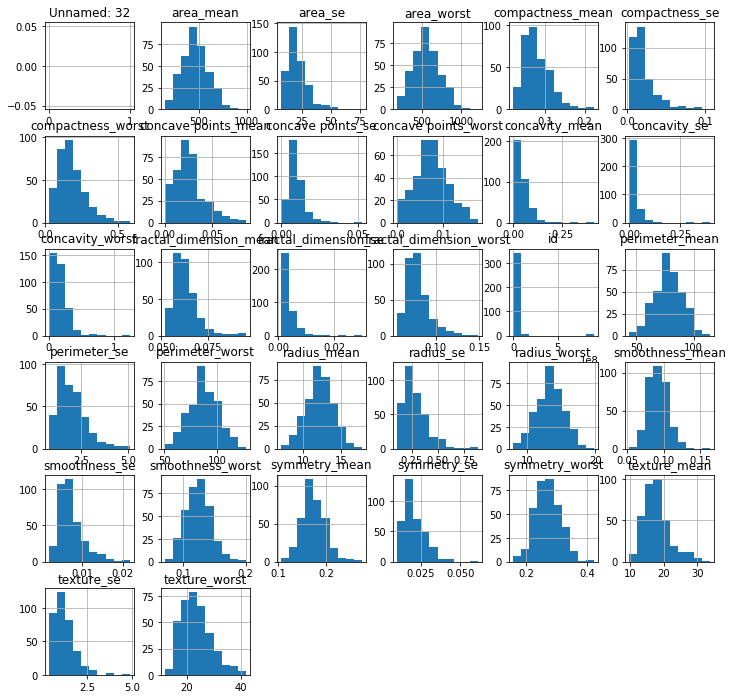

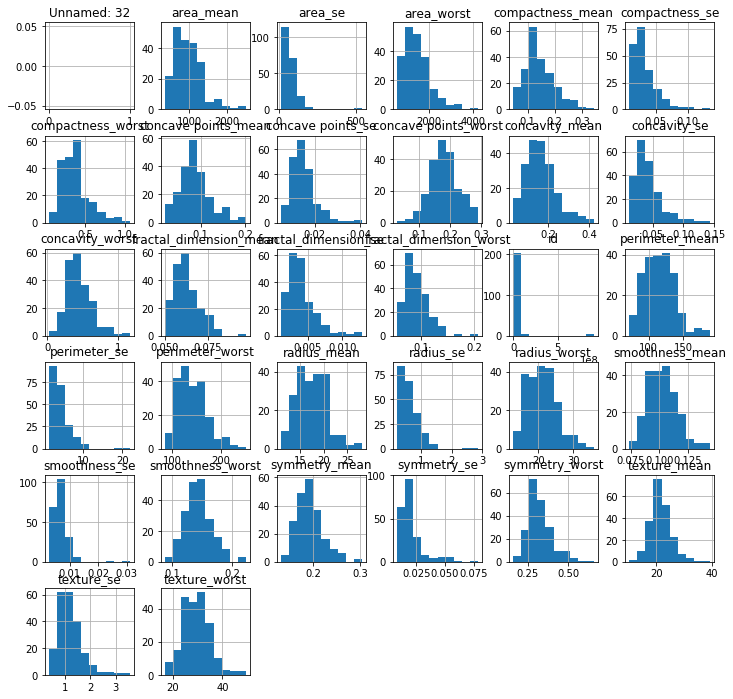

In [6]:
data.groupby('diagnosis').hist(figsize=(12, 12))

In [7]:
#Encoding categorical data 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [8]:
# Splitting the dataset into the Training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

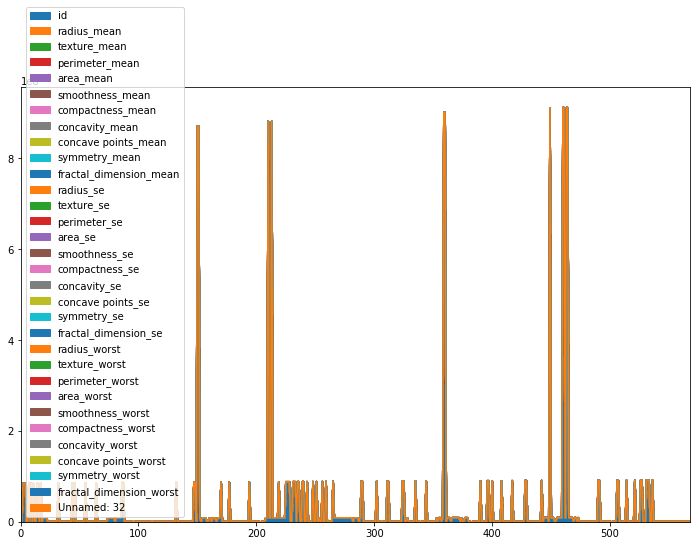

In [9]:
data.iloc[0:569,0:33].plot(kind='area', figsize=(12,8))

In [14]:
# Feature scaling & standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Machine Algorithm

In [46]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [47]:
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
y_pred = svc.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
mat = confusion_matrix(y_pred,Y_test)

In [51]:
mat

array([[88,  2],
       [ 2, 51]])

In [37]:
svm_result = accuracy_score(Y_test, Y_pred)
print("Accuracy : ",svm_result)

Accuracy :  0.986013986013986


# K-Nearest Neighbor Algorithm

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, leaf_size=60, algorithm='brute')

In [21]:
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
Y_pred_knn = knn_clf.predict(X_test)
Y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
cm_knn

array([[89,  1],
       [ 6, 47]])

In [26]:
knn_result = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy : ",knn_result)

Accuracy :  0.951048951048951


# Logistic Regression Algorithm

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/home/nisha/anaconda3/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
Y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[87,  3],
       [ 3, 50]])

In [42]:
result = accuracy_score(Y_test, Y_pred)
print("Accuracy : ",result)

Accuracy :  0.986013986013986


# Random Forest  Algorithm

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
Y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[89,  1],
       [ 1, 52]])

In [49]:
rf_result = accuracy_score(Y_test, Y_pred)
print("Accuracy : ",rf_result)

Accuracy :  0.986013986013986


# Performance comparison and graphs

In [56]:
results = {'Accuracy': [svm_result*100, knn_result*100, result*100,rf_result*100]}
idx = ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic regression','Random Forest']

results = pd.DataFrame(results, index=idx)

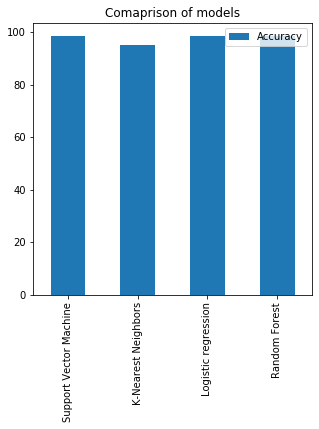

In [57]:
fig = results.plot(kind='bar', title='Comaprison of models', figsize =(5,5))

# SVM Accuracy : 98.6
# KNN Accuracy : 95.1
# Logistic Regression Accuracy :  98.6
# Random Forest Accuracy : 98.6
